In [30]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

#
rand_er_model = nx.fast_gnp_random_graph(100, 0.99)
#rand_er_model.add_edge(0,1)
print(nx.edges(rand_er_model))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15),

In [18]:
def centrality_change(G, pair_list = [], measure = "degree"):
    """
    Takes in list of node pairs that have non-edges and finds the 
    change in centrality measure for input "measure," which could be closeness,
    betweenness, and degree centrality.
    
    If a node pair in pair_list has edge connecting them, the edge will not be removed, 
    and obviously it will not affect change in centrality (i think)
    """
    for edge in pair_list:
        if edge not in list(nx.non_edges(G)):
            pair_list.remove(edge)
    #print("calculating ", measure, " centrality")
    centrality_measure_before = []
    if measure == "closeness":
        centrality_measure_before = nx.closeness_centrality(G)
    elif measure == "betweenness":
        centrality_measure_before = nx.betweenness_centrality(G)
    else:
        centrality_measure_before = nx.degree_centrality(G)
    
    G.add_edges_from(pair_list)
    centrality_measure_after = []
    
    if measure == "closeness":
        centrality_measure_after = nx.closeness_centrality(G)
    elif measure == "betweenness":
        centrality_measure_after = nx.betweenness_centrality(G)
    else:
        centrality_measure_after = nx.degree_centrality(G)

    diff = []
    for x in nx.nodes(G):
        diff.append((x, centrality_measure_after[x] - centrality_measure_before[x]))
    G.remove_edges_from(pair_list)
    return diff

In [19]:
print((nx.non_edges(rand_er_model)))

<generator object non_edges at 0xa1bc38750>


In [20]:
#centrality_change test    
#degree centrality change test
for x, y in centrality_change(rand_er_model, [(4,11)], "degree"):
    if not y == 0:
        print(x, ": ", y)
        
#betweenness centrality change test
for x,y in centrality_change(rand_er_model, [(0,1)], "betweenness"):
    if not y == 0:
        print(x, ": ", y)

#closeness centrality change test
for x, y in centrality_change(rand_er_model, [(0,1)], "closeness"):
    if not y == 0:
        print(x, ": ", y)

4 :  0.010101010101010055
11 :  0.010101010101010166


In [31]:
#plt.hist(, bins = 'auto')

print("starting calculations")
plotHist = []
for x,y in nx.non_edges(rand_er_model):
    print("calculating ", x, " and ", y, " edge")
    plotHist = plotHist + (centrality_change(rand_er_model, [(x,y)], "betweenness"))
    


    
    

starting calculations
calculating  2  and  86  edge
calculating  3  and  63  edge
calculating  4  and  23  edge
calculating  5  and  18  edge
calculating  5  and  6  edge
calculating  6  and  77  edge
calculating  7  and  73  edge
calculating  8  and  44  edge
calculating  10  and  25  edge
calculating  12  and  50  edge
calculating  18  and  70  edge
calculating  24  and  96  edge
calculating  24  and  37  edge
calculating  24  and  62  edge
calculating  25  and  40  edge
calculating  27  and  90  edge
calculating  27  and  76  edge
calculating  33  and  67  edge
calculating  33  and  45  edge
calculating  36  and  51  edge
calculating  38  and  59  edge
calculating  40  and  49  edge
calculating  41  and  92  edge
calculating  42  and  54  edge
calculating  46  and  56  edge
calculating  47  and  94  edge
calculating  48  and  69  edge
calculating  50  and  57  edge
calculating  51  and  82  edge
calculating  51  and  60  edge
calculating  52  and  75  edge
calculating  58  and  68  

<IPython.core.display.Javascript object>


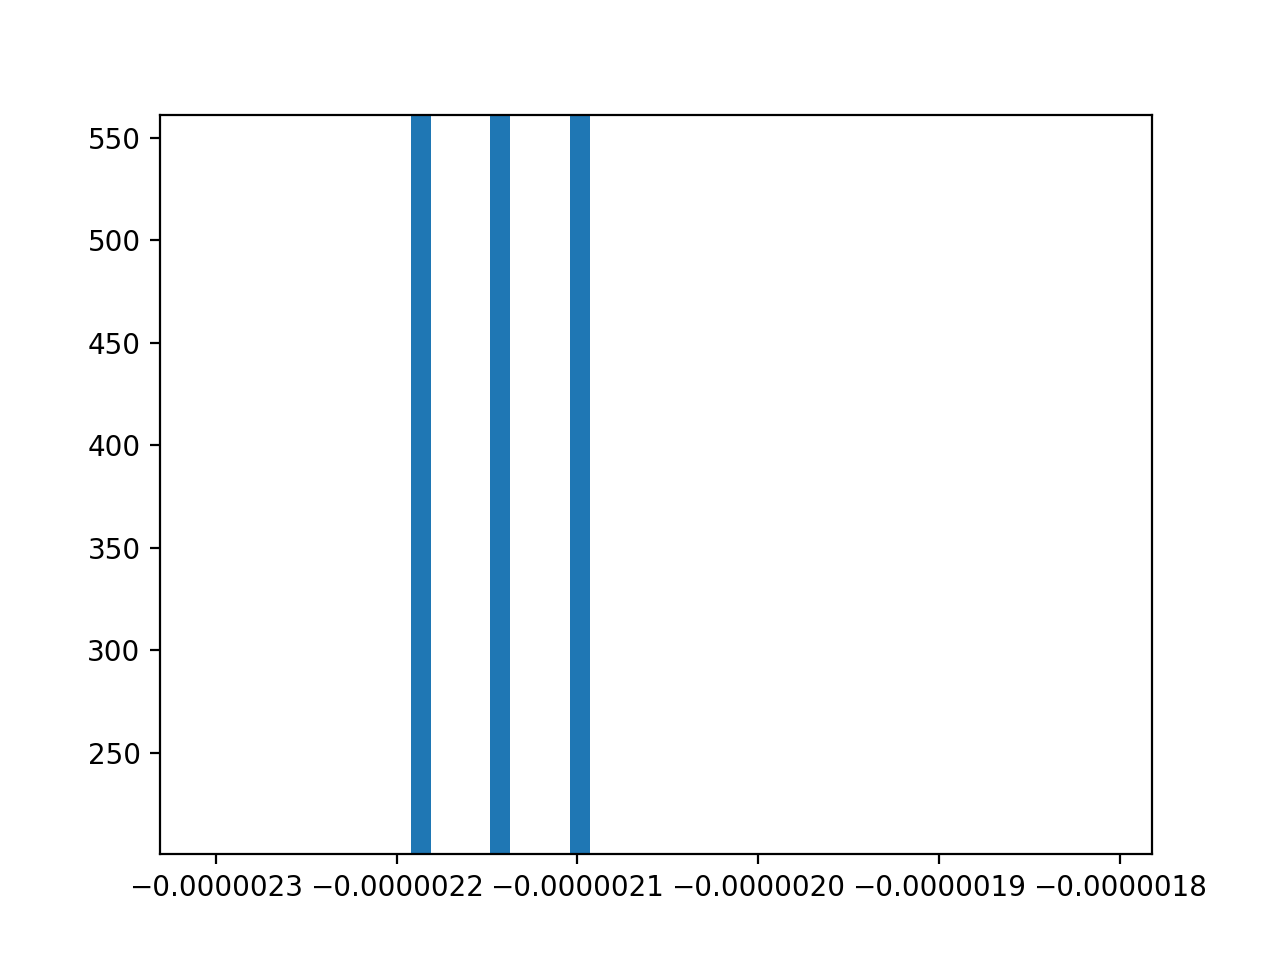

(array([1.890e+02, 0.000e+00, 1.000e+00, 0.000e+00, 1.042e+03, 0.000e+00,
        1.400e+01, 0.000e+00, 1.351e+03, 0.000e+00, 7.000e+00, 0.000e+00,
        1.274e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [33]:
#print(plotHist)
plt.hist([y for x,y in plotHist], bins = 'auto')